<a href="https://colab.research.google.com/github/juliosdutra/FundamentosComputacionais/blob/main/Pandas_Exemplo_Aplicado_CO2_PIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Análise de Dados Públicos com Pandas - Emissões de CO₂ vs PIB

## 📘 Objetivo
Neste notebook, vamos utilizar dados públicos do repositório **Our World in Data** para analisar a relação entre o **PIB** e as **emissões de CO₂** do Brasil ao longo dos anos. A proposta é explorar o uso da biblioteca **Pandas** para:

- Ler e filtrar dados reais a partir de um arquivo CSV online;
- Limpar e selecionar colunas relevantes;
- Visualizar séries temporais com gráficos;
- Aplicar um **ajuste linear** usando NumPy;
- Interpretar os resultados com base em **visualizações em escala linear e logarítmica**.

---

## 📂 Fonte dos dados
Os dados utilizados estão disponíveis publicamente em:

🔗 [https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv](https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv)

Repositório: *Our World in Data* – [https://ourworldindata.org/co2](https://ourworldindata.org/co2)

---

## 🧑‍🔬 Aplicação na Engenharia e Ciência de Dados
Este exemplo demonstra como o uso de ferramentas computacionais pode auxiliar na análise e modelagem de dados ambientais e econômicos, com aplicações em:

- Engenharia ambiental;
- Sustentabilidade;
- Políticas públicas;
- Processos industriais com foco em emissões;
- Ensino de ciência de dados aplicada.

---


## 🔹 1. Importar bibliotecas

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🔹 2. Carregar o conjunto de dados

In [45]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

In [46]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


O arquivo CSV contém dados históricos de todos os países, com informações como $\text{CO₂}$, PIB, população etc.

Use também `df.info()` para explorar a estrutura dos dados.

In [47]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

## 🔹 3. Filtrar dados apenas para o Brasil

Aqui estamos selecionando apenas as linhas onde a coluna country é igual a 'Brazil'.

> Alternativamente, poder-se-ia utilizar o método `.query()`, que permite aplicar expressões booleanas em formato de string para filtrar linhas de um DataFrame. As colunas podem ser referenciadas como se fossem variáveis, sem necessidade de colchetes:
  `df.query("country == 'Brazil'")`

In [48]:
df_brasil = df[df['country'] == 'Brazil']

In [49]:
df_brasil

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
7005,Brazil,1850,BRA,7233093.0,6.271878e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46.168,3.509,NaN,NaN
7006,Brazil,1851,BRA,7346113.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.507,0.000,0.000,0.000,0.000,54.861,3.561,NaN,NaN
7007,Brazil,1852,BRA,7460007.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.349,0.000,0.000,0.000,0.000,42.496,3.612,NaN,NaN
7008,Brazil,1853,BRA,7574774.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.287,0.000,0.000,0.000,0.000,42.189,3.664,NaN,NaN
7009,Brazil,1854,BRA,7691306.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.267,0.000,0.000,0.000,0.000,44.983,3.716,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,Brazil,2019,BRA,207455459.0,3.050327e+12,21.048,0.101,473.390,-4.989,-1.043,...,2.094,5.047,0.024,0.052,0.079,0.003,2278.087,710.160,3.325,0.702
7175,Brazil,2020,BRA,208660845.0,2.950378e+12,23.366,0.112,445.208,-28.182,-5.953,...,2.166,5.045,0.024,0.053,0.080,0.003,2358.869,684.747,-15.721,-3.531
7176,Brazil,2021,BRA,209550291.0,3.097565e+12,24.488,0.117,498.017,52.809,11.862,...,2.120,5.044,0.024,0.054,0.082,0.003,2553.401,740.368,-32.372,-6.500
7177,Brazil,2022,BRA,210306411.0,3.187413e+12,23.845,0.113,483.841,-14.176,-2.847,...,2.121,5.036,0.025,0.055,0.083,0.003,2438.436,726.190,-25.443,-5.259


## 🔹 4. Selecionar as colunas relevantes para o problema

Mantemos apenas as colunas de interesse para este estudo: ano, emissão de $\text{CO₂}$ e PIB.



In [50]:
df_brasil = df_brasil[['year', 'co2', 'gdp']]
df_brasil

,year,co2,gdp
7005,1850,NaN,6.271878e+09
7006,1851,NaN,NaN
7007,1852,NaN,NaN
7008,1853,NaN,NaN
7009,1854,NaN,NaN
...,...,...,...
7174,2019,473.390,3.050327e+12
7175,2020,445.208,2.950378e+12
7176,2021,498.017,3.097565e+12
7177,2022,483.841,3.187413e+12


In [51]:
df_brasil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 7005 to 7178
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    174 non-null    int64  
 1   co2     168 non-null    float64
 2   gdp     154 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.4 KB


## 🔹 5. Remover linhas com valores ausentes

Remove qualquer linha que tenha NaN em uma das colunas selecionadas.



In [52]:
df_brasil = df_brasil.dropna()
df_brasil

,year,co2,gdp
7025,1870,0.698,1.061995e+10
7026,1871,0.845,1.081832e+10
7027,1872,0.858,1.140737e+10
7028,1873,1.029,1.127986e+10
7029,1874,0.996,1.167051e+10
...,...,...,...
7173,2018,478.379,3.013541e+12
7174,2019,473.390,3.050327e+12
7175,2020,445.208,2.950378e+12
7176,2021,498.017,3.097565e+12


## 🔹 6. Visualizar evolução das emissões ao longo do tempo

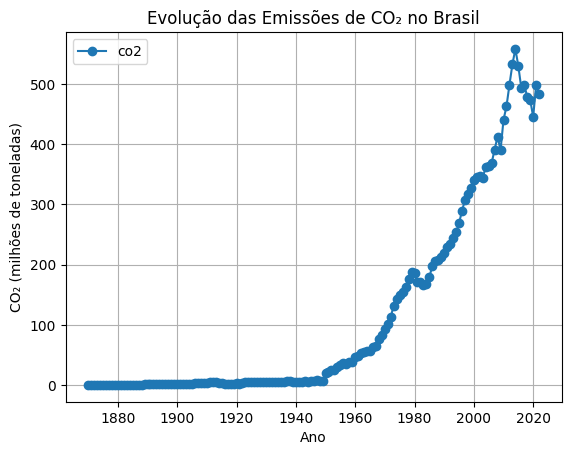

In [53]:
df_final = df_brasil.copy().reset_index(drop=True)


df_final.plot(x='year', y='co2', kind='line', marker='o')
plt.title('Evolução das Emissões de CO₂ no Brasil')
plt.xlabel('Ano')
plt.ylabel('CO₂ (milhões de toneladas)')
plt.grid(True)
plt.show()

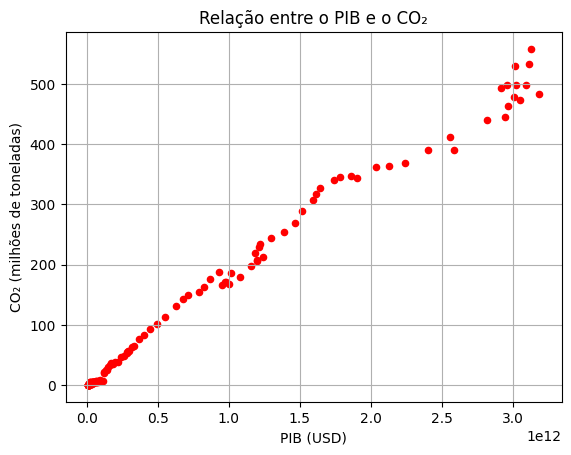

In [54]:
df_final.plot(x='gdp', y='co2', kind='scatter', marker='o', color = 'red')
plt.title('Relação entre o PIB e o CO₂')
plt.xlabel('PIB (USD)')
plt.ylabel('CO₂ (milhões de toneladas)')
plt.grid(True)
plt.show()

## 🔹 7. Ajuste linear: CO₂ em função do PIB

Aplicamos um ajuste linear do tipo $y = a\cdot x + b$, onde $x = PIB$ e $y =$ emissão de CO₂.

In [55]:
# Ajuste linear com np.polyfit
coef = np.polyfit(df_final['gdp'], df_final['co2'], deg=1)  # grau 1 = linear
a, b = coef

# Equação: y = a*x + b
df_final['co2_ajustada'] = a * df_final['gdp'] + b

In [56]:
df_final

,year,co2,gdp,co2_ajustada
0,1870,0.698,1.061995e+10,5.307651
1,1871,0.845,1.081832e+10,5.340846
2,1872,0.858,1.140737e+10,5.439413
3,1873,1.029,1.127986e+10,5.418076
4,1874,0.996,1.167051e+10,5.483445
...,...,...,...,...
148,2018,478.379,3.013541e+12,507.792937
149,2019,473.390,3.050327e+12,513.948441
150,2020,445.208,2.950378e+12,497.223635
151,2021,498.017,3.097565e+12,521.852893


## 🔹 8. Plotar os dados reais e a reta de ajuste

O gráfico mostra os pontos reais e a reta ajustada. A legenda traz a equação da reta com coeficientes aproximados.

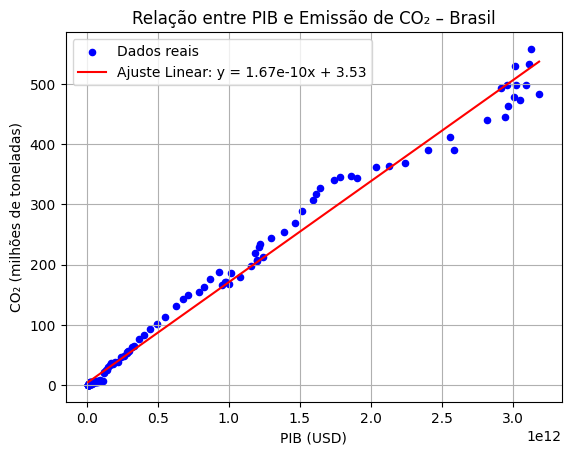

In [58]:
ax = df_final.plot.scatter(x='gdp', y='co2', label='Dados reais', color='blue')
df_final.plot(x='gdp', y='co2_ajustada', ax=ax, label=f'Ajuste Linear: y = {a:.2e}x + {b:.2f}', color='red')

plt.title('Relação entre PIB e Emissão de CO₂ – Brasil')
plt.xlabel('PIB (USD)')
plt.ylabel('CO₂ (milhões de toneladas)')
plt.grid(True)
plt.show()


**ℹ️ Comentário sobre o uso de escala logarítmica**

A aplicação de uma escala logarítmica no eixo x (PIB) permite uma melhor visualização da relação entre variáveis que variam em ordens de grandeza diferentes. Neste caso, o PIB do Brasil aumentou significativamente ao longo das décadas, o que pode comprimir ou distorcer visualmente os dados em uma escala linear.

Com a escala log aplicada:

* Pequenas e grandes variações de PIB ficam mais proporcionais no gráfico;
* Padrões mais sutis na emissão de CO₂ tornam-se visíveis;
* Fica mais fácil identificar se a relação entre CO₂ e PIB segue uma tendência logarítmica ou exponencial.

> 💡 Esse tipo de transformação é comum em análises econômicas, ambientais e científicas, onde as variáveis crescem de forma não linear.

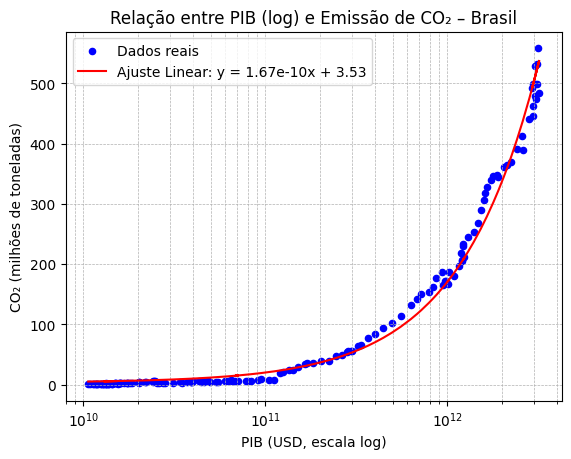

In [59]:
ax = df_final.plot.scatter(x='gdp', y='co2', label='Dados reais', color='blue')
df_final.plot(x='gdp', y='co2_ajustada', ax=ax, label=f'Ajuste Linear: y = {a:.2e}x + {b:.2f}', color='red')

plt.xscale('log')  # escala logarítmica no eixo x
plt.title('Relação entre PIB (log) e Emissão de CO₂ – Brasil')
plt.xlabel('PIB (USD, escala log)')
plt.ylabel('CO₂ (milhões de toneladas)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


> 💡 Dica:
Se quiser aplicar um ajuste linear nos dados transformados com log do PIB, também é possível, em vez de apenas mudar a escala:
```python
  log_gdp = np.log10(df_brasil['gdp'])
  df_brasil['co2_logfit'], a_log, b_log = ajuste_linear(log_gdp, df_brasil['co2'])
```
Isso gera uma reta para o modelo $CO₂ = a \cdot log(PIB) + b$, mais realista em alguns contextos ambientais.

## 🧠 Conclusão

Com base nos dados, podemos observar se há uma tendência linear entre crescimento econômico e emissões de carbono no Brasil.
Esse tipo de análise é útil em engenharia ambiental, políticas públicas, sustentabilidade e modelagem de sistemas dinâmicos.

## 🧭 Explorações Extras (Desafios sugeridos)

A seguir, algumas sugestões para expandir a análise utilizando o mesmo conjunto de dados do Our World in Data:

---



### 🌍 1. Comparar Brasil com outros países

- Filtre e compare as emissões de CO₂ do **Brasil**, **Estados Unidos**, **Índia** e **China** ao longo do tempo.
- Visualize em um gráfico de linha:

```python
paises = ['Brazil', 'United States', 'India', 'China']
df_multi = df[df['country'].isin(paises)]
df_multi = df_multi[['country', 'year', 'co2']].dropna()

# Gráfico
import seaborn as sns
sns.lineplot(data=df_multi, x='year', y='co2', hue='country')
plt.title('Emissões de CO₂ por País')
plt.ylabel('CO₂ (milhões de toneladas)')
plt.grid(True)`



###  📈 2. Calcular o crescimento percentual das emissões por década
* Agrupe os dados por país e década (`df['year'] // 10 * 10`)
* Calcule o crescimento percentual entre décadas
* Plote gráficos de barras



### 🔢 3. Explorar a correlação entre variáveis

* Verifique a correlação entre:
  * PIB (`gdp`)
  * População (`population`)
  * CO₂ (`co2`)

* Use `df.corr()` para gerar uma matriz de correlação



### 🌐 4. Visualizar o top 10 países que mais emitiram CO₂ em um determinado ano

```python
df_2019 = df[df['year'] == 2019]
top10 = df_2019.sort_values(by='co2', ascending=False).head(10)
top10[['country', 'co2']].plot(kind='bar', x='country', y='co2', legend=False)
plt.title('Top 10 Países em Emissão de CO₂ (2019)')
plt.ylabel('CO₂ (milhões de toneladas)')
```



###⏳ 5. Criar gráficos interativos com plotly (opcional)

Explore como usar plotly.express para fazer gráficos interativos de linha, dispersão ou mapa com os dados do mundo

In [61]:
import plotly.express as px
df_plot = df[df['year'] == 2019]
fig = px.choropleth(df_plot, locations='iso_code', color='co2',
                    hover_name='country', title='Emissões de CO₂ (2019)')
fig.show()

> 💡 Esses exercícios reforçam o uso de **Pandas para filtragem e agrupamento**, além de introduzir **visualizações comparativas** e análises multivariadas.